In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('Advertising.csv')
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
dataset.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
dataset.shape

(200, 5)

In [10]:
feature = ['TV','Radio','Newspaper']

X = dataset[feature]
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [31]:
import seaborn as sns

%matplotlib inline

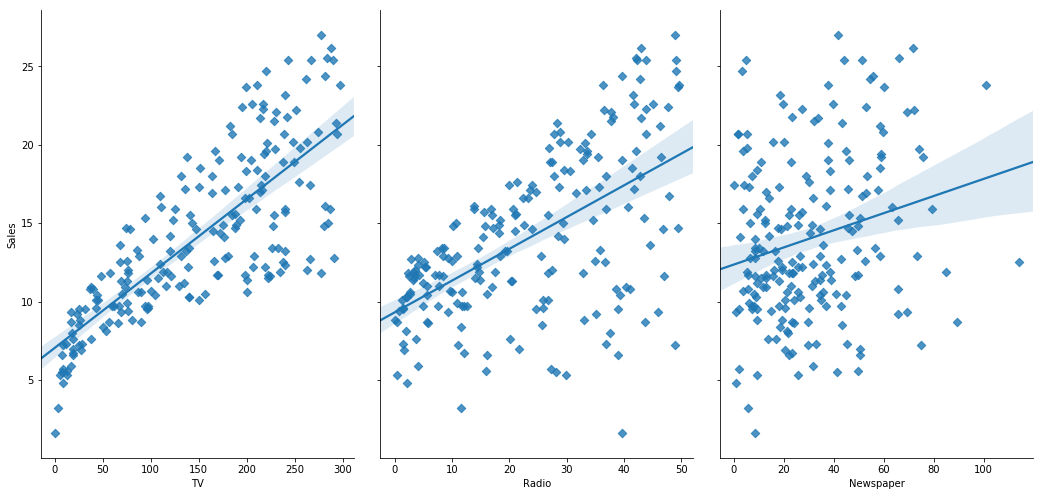

In [46]:
sns.pairplot(dataset, x_vars=feature, y_vars='Sales', size=7, aspect=0.7, kind='reg', markers=["D"], dropna=True,
             diag_kind='kde')


In [48]:
y = dataset.Sales
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [50]:
# Spliting of x and y as train or test set...
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\Adil\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [58]:
# import linear regression from sklearn
from sklearn.linear_model import LinearRegression

linreg= LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
slope = linreg.intercept_
coefficent = linreg.coef_
print("slope =",slope, "Coefficent =", coefficent)

slope = 2.87696662232 Coefficent = [ 0.04656457  0.17915812  0.00345046]


In [66]:
# pairing of each coefficient with its features
list(zip(feature, coefficent))

[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804065)]

In [73]:
# making prediction of test
y_pred = linreg.predict(X_test)

In [92]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [94]:
# calculate Mean absolute Error using sklearn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))
# metrics.mean_absolute_error?

10.0


In [96]:
MSE = metrics.mean_squared_error(true, pred)
print(MSE)

150.0


In [97]:
import numpy as np
print(np.sqrt(MSE))

12.2474487139


In [98]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


In [105]:
# Train testing
Y_pred = linreg.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train, Y_pred)))

1.75692667657


In [106]:
from sklearn.metrics import r2_score
r2_score(y_train, Y_pred)

0.89030755775566495